In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import silhouette_score,classification_report
%matplotlib inline

###### In this case, sheet_name='data' is used to specify that the data should be read from the sheet named "data" in the Excel file "EastWestAirlines.xlsx". If no sheet name is provided, by default the function reads the first sheet in the file.

In [2]:
df=pd.read_excel(r'C:\Users\shree\3D Objects\Assignment 7\EastWestAirlines.xlsx',sheet_name='data',index_col=0)    
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

In [3]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

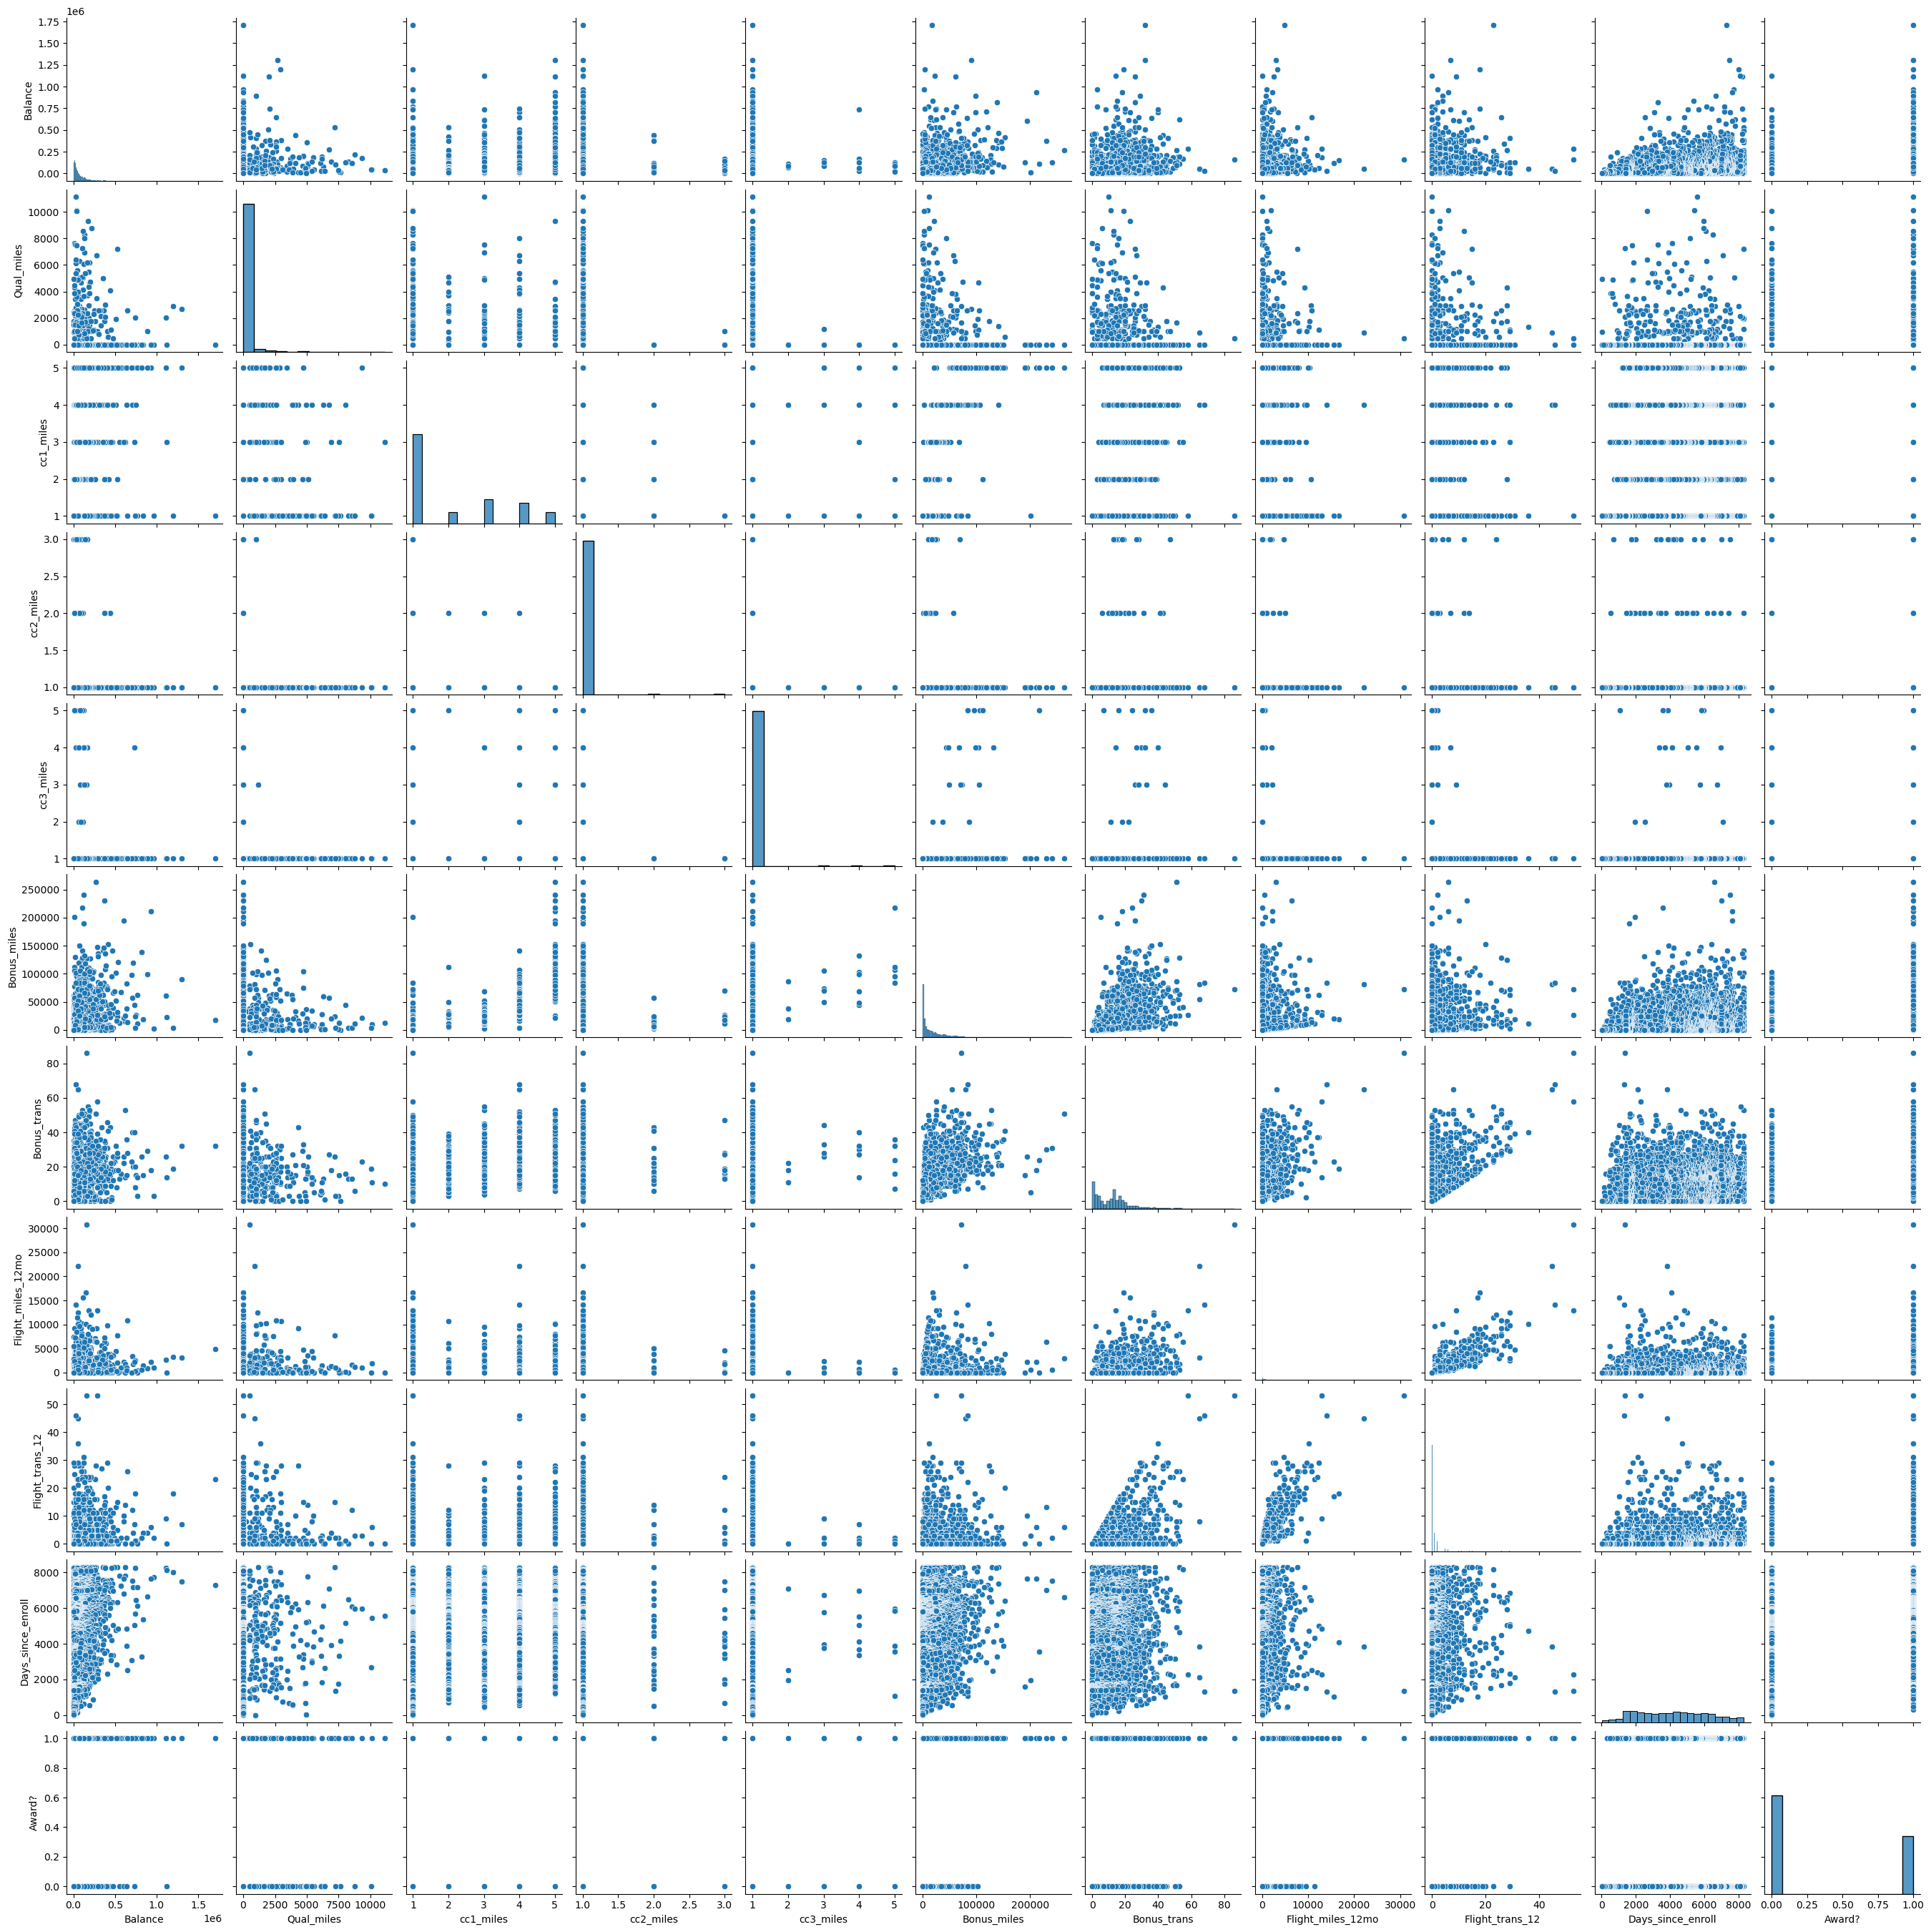

In [6]:
sns.pairplot(data=df)

In [7]:
df.rename(columns={'Award?':'Award'},inplace=True)

In [8]:
x=df

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [11]:
from scipy.cluster import hierarchy

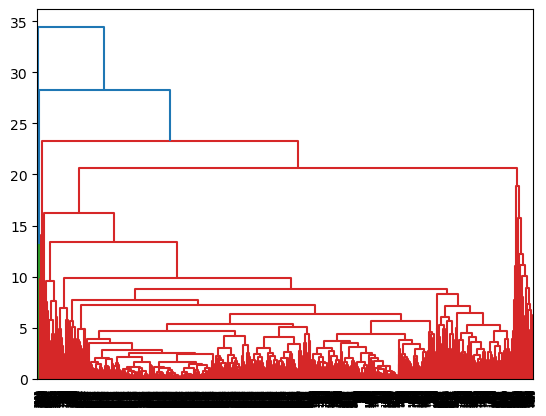

In [12]:
he=hierarchy.linkage(x,method='complete')
dedo=hierarchy.dendrogram(he)

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
ag=AgglomerativeClustering(n_clusters=4)
y=ag.fit_predict(x)

In [15]:
silhouette_score(x,y)

0.3081415285202279

In [16]:
df['cluster']=y

In [17]:
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               2077                4               6935   

     Award  cluster  
ID#                  
1        0        1  
2        0        1  
3        0        1  
4        0        1  
5        1        0

In [18]:
x=pd.DataFrame(x)

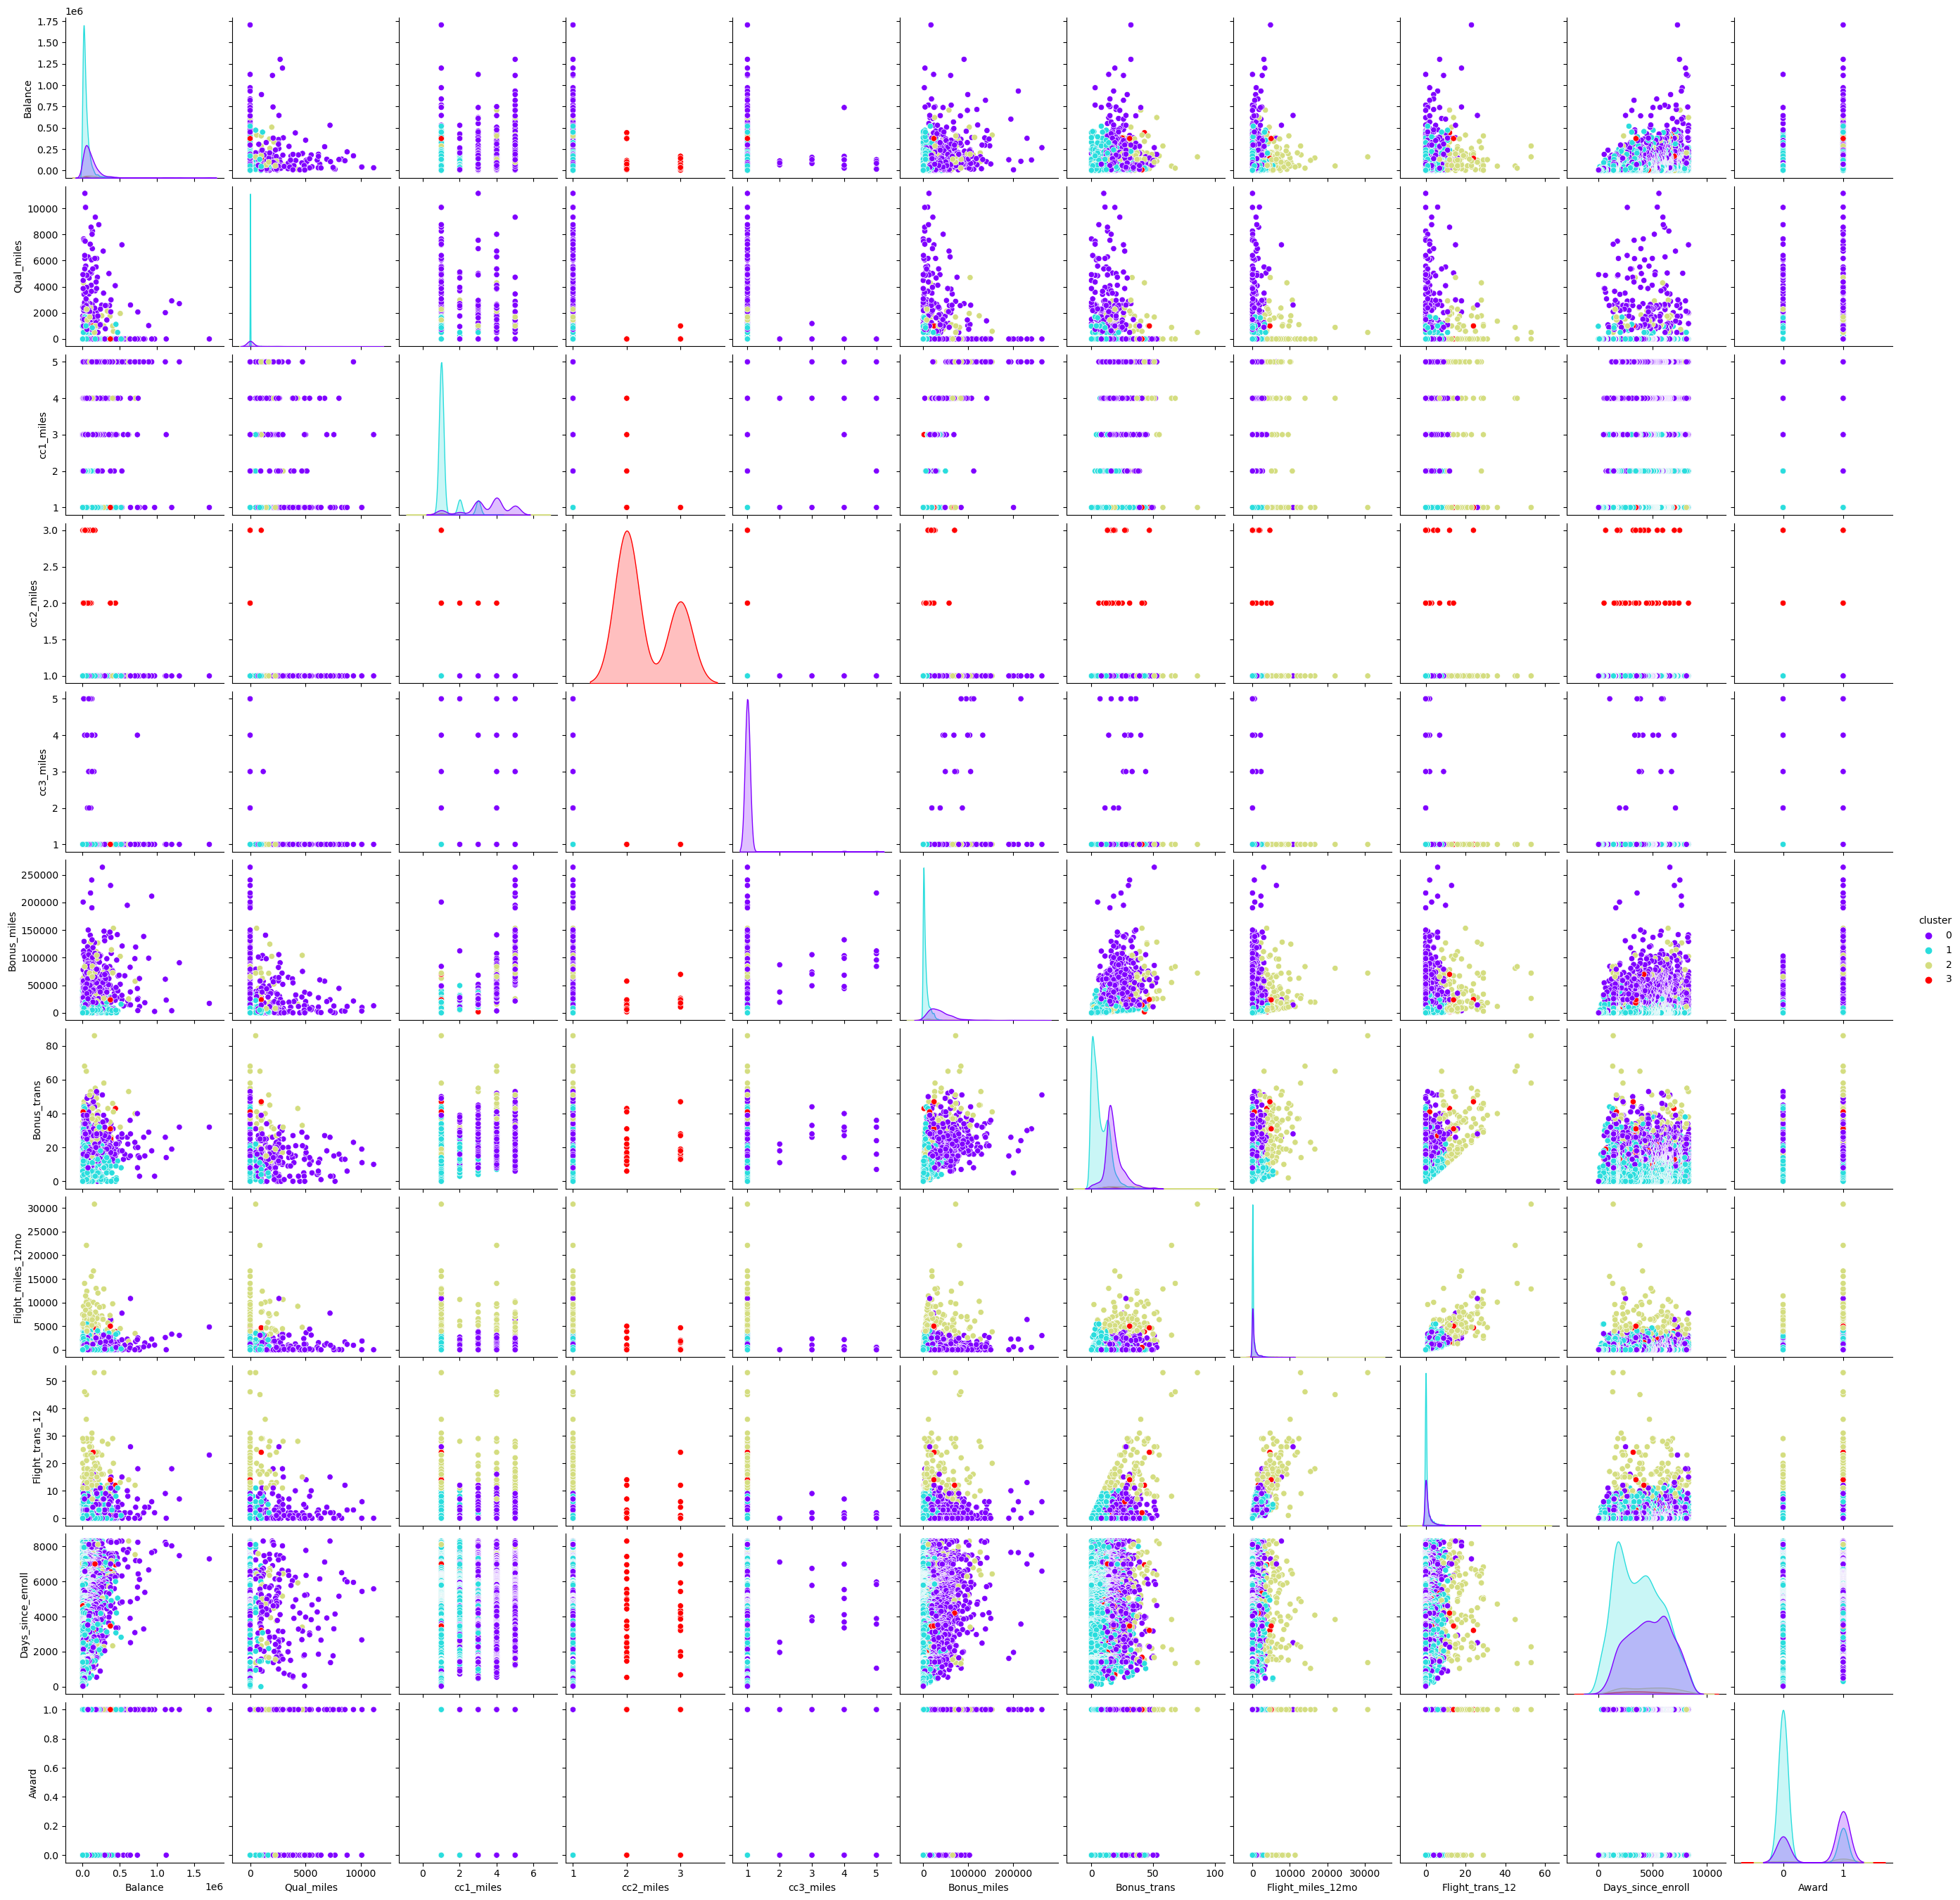

In [19]:
sns.pairplot(df,hue='cluster',palette='rainbow')

In [20]:
df.groupby(by='cluster').mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
0        116314.450725  363.839130   3.498551   1.000000   1.035507   
1         46329.336877    9.028618   1.244072   1.000000   1.000000   
2        134880.892308  393.323077   2.430769   1.000000   1.000000   
3         68876.581395   23.255814   1.139535   2.348837   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
0        37150.356522    18.066667         377.000000         1.150000   
1         4868.112428     6.907604         214.812756         0.673753   
2        36582.169231    29.338462        5915.523077        16.638462   
3        14689.837209    17.534884         582.627907         2.209302   

         Days_since_enroll     Award  
cluster                               
0              4696.888406  0.663043  
1              3769.337694  0.184383  
2              4599.607692  0.753846  
3              3968.930233  0.395349

<AxesSubplot:xlabel='Balance', ylabel='Bonus_miles'>

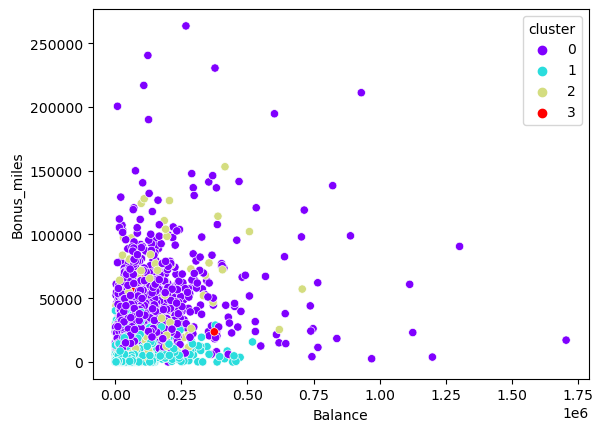

In [21]:
sns.scatterplot(df['Balance'],df['Bonus_miles'],hue=df['cluster'],palette='rainbow')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [24]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       282
           1       0.97      0.97      0.97       479
           2       0.81      0.87      0.84        30
           3       1.00      1.00      1.00         9

    accuracy                           0.95       800
   macro avg       0.93      0.94      0.94       800
weighted avg       0.96      0.95      0.96       800



In [26]:
from sklearn.cluster import KMeans

In [27]:
km=KMeans()
y=km.fit_predict(x)

In [30]:
silhouette_score(x,y)

0.28042774096208484

In [41]:
wcss=[]
for i in range(2,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [42]:
wcss

[35409.516629861304,
 30899.21640879058,
 27153.94818714846,
 25175.476948992742,
 21479.98195290324,
 18891.750169018444,
 17316.70100794697,
 15960.406001471114,
 14727.268473622606,
 13706.053425162709,
 12946.964984983235,
 12494.644284729244,
 11975.394898835217,
 11517.999733236446,
 11165.62514831698,
 10750.758604195948,
 10399.968126009735,
 10009.797923507169]

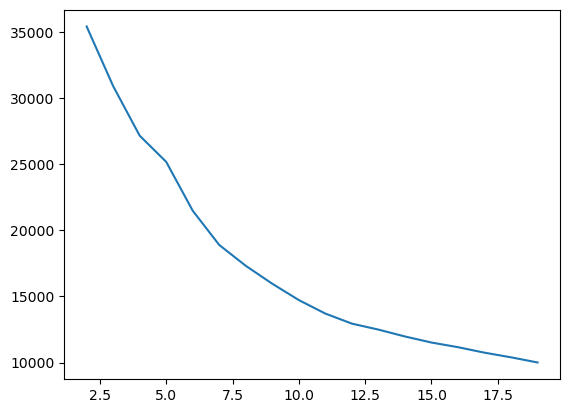

In [44]:
plt.plot(range(2,20),wcss)

In [45]:
km=KMeans(n_clusters=6)
y=km.fit_predict(x)

In [46]:
silhouette_score(x,y)

0.33224474792997405

In [47]:
df['kcluster']=y

In [48]:
df.groupby(by='kcluster').mean()

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
kcluster                                                                
0         116709.699921    60.064133   3.694378   1.000000   1.001584   
1         198312.313433   495.776119   2.328358   1.000000   1.000000   
2          43504.472010    42.457511   1.222312   1.000000   1.000403   
3         138061.400000    78.800000   3.466667   1.000000   4.066667   
4          68876.581395    23.255814   1.139535   2.348837   1.000000   
5         119660.491803  5351.065574   2.000000   1.000000   1.000000   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
kcluster                                                                  
0         38956.973080    18.760887         351.703088         1.051465   
1         35929.231343    28.791045        5863.783582        17.074627   
2          4577.041079     6.815143         208.771647         0.637535   
3         93927.866667    28.066667         506.666667         1.600000   
4         14689.837209    17.534884         582.627907         2.209302   
5         18683.475410    12.229508         963.639344         2.868852   

          Days_since_enroll     Award   cluster  
kcluster                                         
0               4894.114806  0.646081  0.083135  
1               4716.246269  0.820896  1.723881  
2               3695.022956  0.199758  0.953685  
3               4613.866667  0.533333  0.000000  
4               3968.930233  0.395349  3.000000  
5               3971.491803  0.557377  0.032787

<AxesSubplot:xlabel='Balance', ylabel='Bonus_trans'>

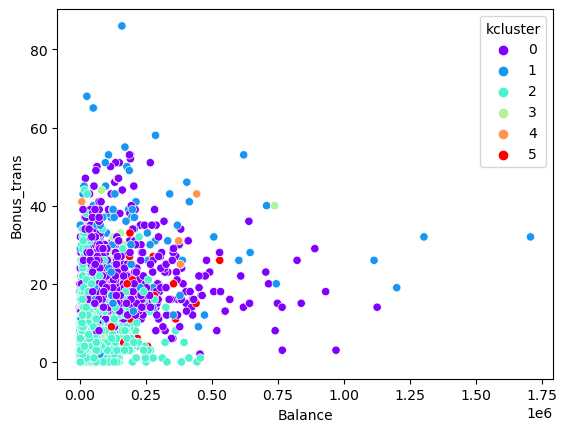

In [49]:
sns.scatterplot(df['Balance'],df['Bonus_trans'],hue=df['kcluster'],palette='rainbow')

### Dbscan

In [50]:
from sklearn.cluster import DBSCAN

In [51]:
db=DBSCAN()
y=db.fit_predict(x)
silhouette_score(x,y)

-0.07834757831741158

#### Selecting Min_samples:

Number of columns + 1 Number of columns * 2 ++== Number of Dimension + 1 Always keep min_sample at least 3.

In [52]:
from sklearn.neighbors import NearestNeighbors

In [53]:
ne=NearestNeighbors(n_neighbors=3).fit(x)

In [54]:
d,i=ne.kneighbors(x)
d

array([[0.        , 0.11184685, 0.12034246],
       [0.        , 0.11406276, 0.11437601],
       [0.        , 0.16540223, 0.19458949],
       ...,
       [0.        , 0.16614779, 0.28024323],
       [0.        , 0.25725534, 0.27167409],
       [0.        , 0.00270574, 0.0112955 ]])

In [55]:
dist=np.sort(d[:,1],axis=0)

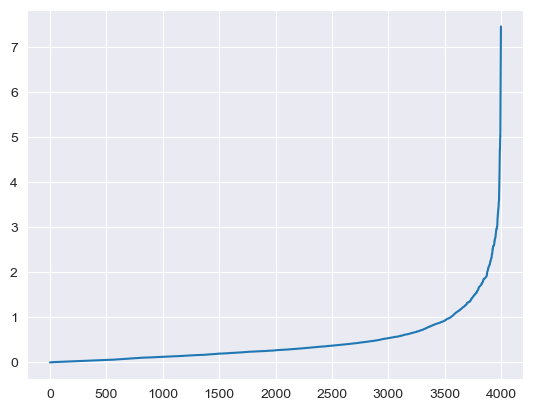

In [56]:
sns.set_style('darkgrid')
plt.plot(dist)

In [57]:
db=DBSCAN(eps=3,min_samples=12)

In [58]:
y=db.fit_predict(x)

In [59]:
silhouette_score(x,y)

0.5445912609076593

In [60]:
df['DBpred']=y
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  cluster  kcluster  DBpred  
ID#                                     
1         0        1         2       0  
2         0        1         2       0  
3         0        1         2       0  
4         0        1         2       0  
5         1        0         0       0  
...     ...      ...       ...     ...  
4017      1        1         2       0  
4018      1        1         2       0  
4019      1        0         0       0  
4020      0        1         2       0  
4021      0        1         2       0  

[3999 rows x 14 columns]

In [61]:
df.groupby(by='DBpred').mean()

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBpred                                                                
-1      303002.206897  1991.931034   2.896552    1.08046   1.563218   
 0       68779.176820   104.030976   2.050336    1.00000   1.000000   
 1       39187.040000     0.000000   1.120000    2.00000   1.000000   
 2       41562.307692     0.000000   1.000000    3.00000   1.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBpred                                                                  
-1      64194.229885    28.758621        4369.977011        12.183908   
 0      16129.909396    11.180692         374.232060         1.136035   
 1      11107.040000    14.840000         224.000000         0.800000   
 2      16338.230769    16.076923         323.076923         0.923077   

        Days_since_enroll     Award   cluster  kcluster  
DBpred                                                   
-1            5074.666667  0.816092  0.816092  2.218391  
 0            4099.718121  0.360867  0.684047  1.362158  
 1            3703.240000  0.320000  3.000000  4.000000  
 2            4133.384615  0.307692  3.000000  4.000000

In [62]:
df.drop(columns=['cluster','kcluster'],inplace=True)

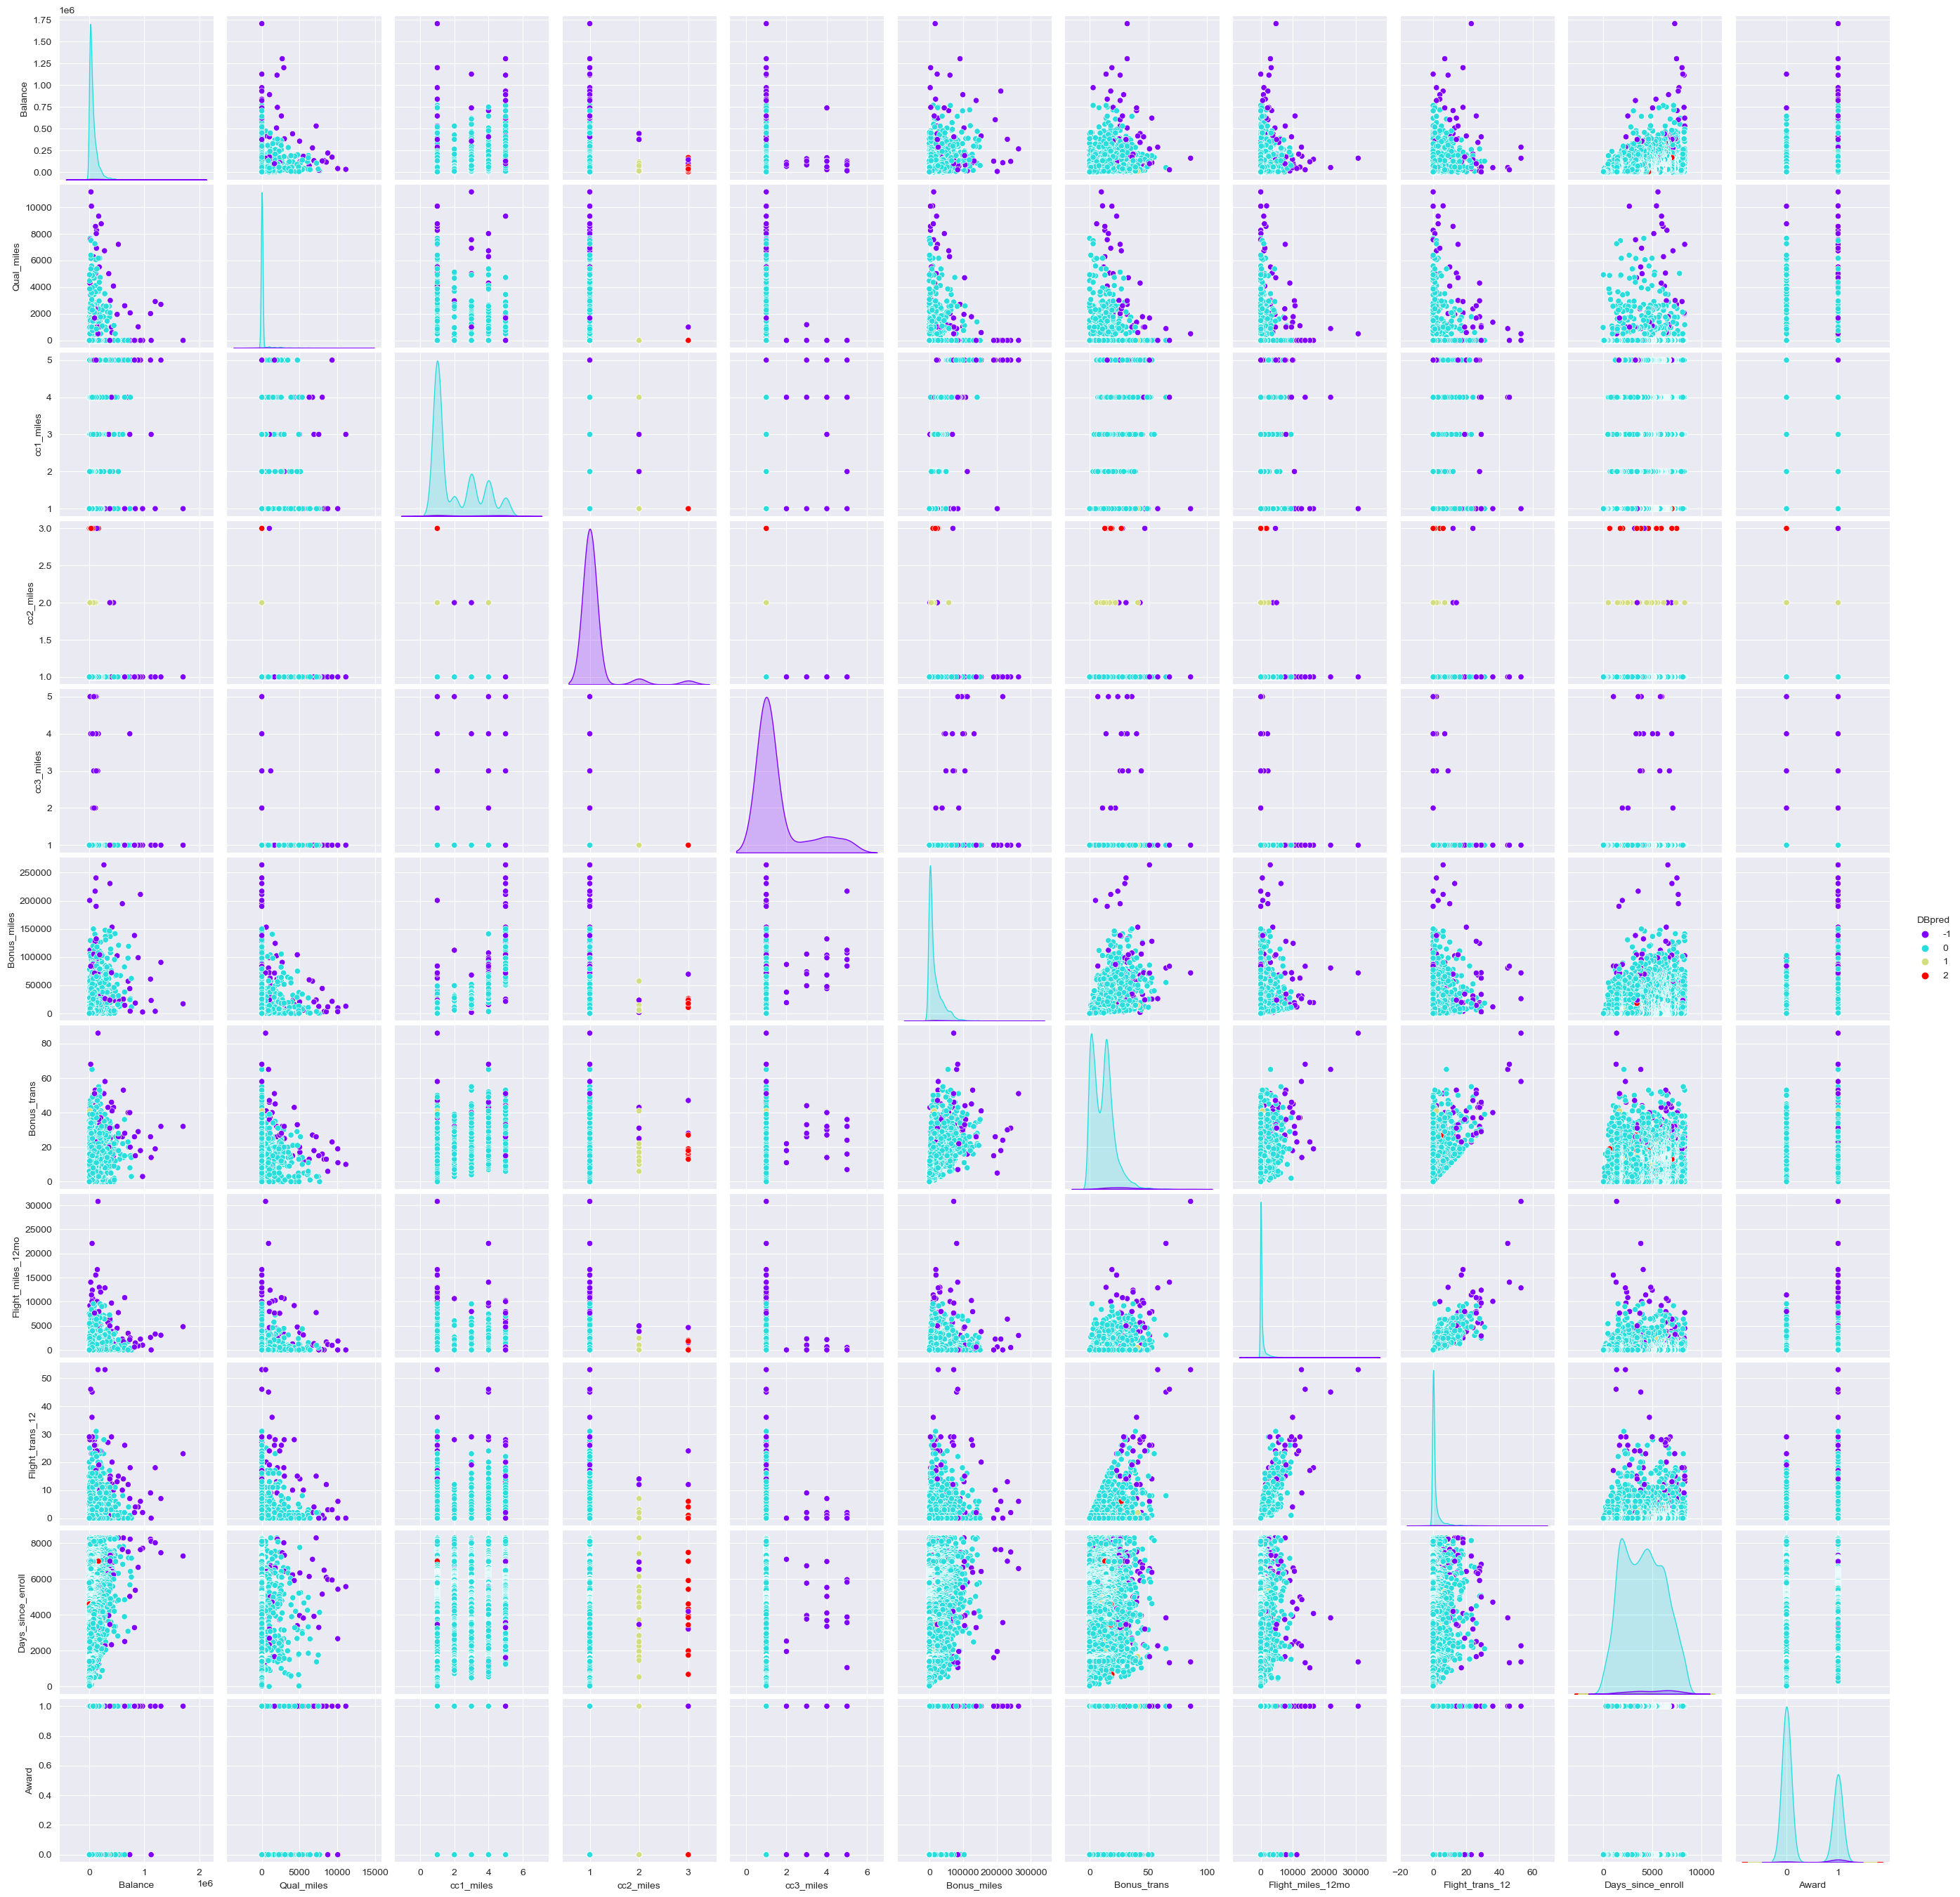

In [63]:
sns.pairplot(df,hue='DBpred',palette='rainbow')